<a href="https://colab.research.google.com/github/nishantsingh23pbt/Nishant/blob/master/jobsegmentation_0ed476_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT PACKAGES**

In [316]:
import pandas as pd
import seaborn as sb
import numpy as np
import seaborn as sns

import scipy.stats
import scipy.special
from scipy.stats.stats import pearsonr

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
%matplotlib inline

import re
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix

from IPython.display import display, HTML
from operator import itemgetter
from IPython.display import SVG

from wordcloud import WordCloud

import plotly.express as px
import plotly.offline as py

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# **THE DATA**

In [256]:
df = pd.read_csv('Dataset1.csv',encoding= 'unicode_escape')
df.head(40)


,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Industry,Sector,Revenue,Competitors,Python,R Prog,Excel,Hadoop,SQL,SAS
0,Data Scientist,Site Name: India - Karnataka - Bangalore\r\nPo...,3.9,GSK,Bengaluru,"Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,500+ billion (INR),"Pfizer, AstraZeneca, Merck",1,0,0,1,0,0
1,Data Scientist,Overview\r\n\r\n\r\nWe have an exciting opport...,4.0,Quanticate,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,1 to 5 billion (INR),"GCE Solutions, Parexel, IQVIA",1,0,0,0,0,1
2,Data Scientist,Provide analytical insights into emerging prob...,3.5,PayPal,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,Internet,Information Technology,500+ billion (INR),"Square, Amazon, Apple",1,0,0,0,1,1
3,Data Scientist,"At Amazon, we strive to be most customer-centr...",4.2,Amazon,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,Internet,Information Technology,500+ billion (INR),"Google, Microsoft, Walmart",1,0,1,0,1,0
4,Data Scientist,"When everything's connected, how we connect is...",3.3,TTEC,Hyderabad,"Englewood, CO",10000+ employees,1982,Company - Public,Staffing & Outsourcing,Business Services,100 to 500 billion (INR),"Teleperformance, TaskUs, Convergys",1,0,1,0,0,1
5,Data Scientist,What You Should Expect\r\n\r\nTo ride the wave...,4.3,Blue Yonder,Bengaluru,"Scottsdale, AZ",5001 to 10000 employees,1985,Company - Private,Enterprise Software & Network Solutions,Information Technology,100 to 500 billion (INR),"SAP, Oracle, Manhattan Associates",0,0,0,0,0,0
6,Data Scientist,"Good understanding of basics of Statistics, Pr...",4.3,Blue Yonder,Bengaluru,"Scottsdale, AZ",5001 to 10000 employees,1985,Company - Private,Enterprise Software & Network Solutions,Information Technology,100 to 500 billion (INR),"SAP, Oracle, Manhattan Associates",1,0,0,0,0,0
7,Data Scientist,Job Description â Data Scientist\r\n\r\nLoca...,3.5,Buckman,Chennai,"Memphis, TN",1001 to 5000 employees,1945,Company - Private,Chemical Manufacturing,Manufacturing,50 to 100 billion (INR),-1,1,0,0,1,1,0
8,Data Scientist,"Analyze raw data: assessing quality, cleansing...",3.2,Corp Talents,Mumbai,"San Jose, CA",201 to 500 employees,2000,Company - Private,-1,-1,500 million to 1 billion (INR),-1,1,0,0,0,1,0
9,Data Scientist,Summary\r\nMiko is a Mumbai based advanced con...,-1.0,Emotix Miko,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,1,0,1,0


In [375]:
salary_dataset = pd.read_csv('Salary_dataset.csv',encoding= 'unicode_escape')
salary_dataset.head(40)

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305
5,5,5-10 yrs,4.\tWillingness to travel;5.\tExperience in Te...,Senior Trainer- Academics,NaN,"academics, effective communication, teacher tr...",Noida,6to10,4428
6,6,13-15 yrs,- Experience in managing fraud analytics with ...,Associate Vice President - Fraud Analytics - S...,Analytics,"Fraud Analytics, People Management Skills, Tea...",Delhi NCR,25to50,1988
7,7,6-10 yrs,Qualified Chartered Accountant with 1-3 yrs of...,Manager - Internal Audit - CA - Big4,NaN,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,6to10,1793
8,8,1-3 yrs,Proven experience as payroll executive or spec...,Payroll Executive,NaN,"esic, hr, bonus, pf, tds, payroll, superannuat...",Ahmedabad(Bodakdev),0to3,3398
9,9,2-6 yrs,Other activities as may be required over the p...,Required CA (manager Finance) for R&R Salons P...,NaN,"accounting standards, finance, auditing, finan...",Bengaluru(Kodihalli),15to25,3444


# **DATA PREPROCESSING**

**DATA CLEANING**

In [258]:
#Removing the un-necessary columns
df.drop(['Industry','Competitors'],axis=1,inplace=True)
salary_dataset.drop(['Unnamed: 0','company_name_encoded'],axis=1,inplace=True)


In [84]:
df = df.drop(labels=[30], axis=0)


In [259]:
df.isnull().sum()

Job.Title            0
Job.Description      0
Rating               0
Company.Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type.of.ownership    0
Sector               0
Revenue              0
Python               0
R Prog               0
Excel                0
Hadoop               0
SQL                  0
SAS                  0
dtype: int64

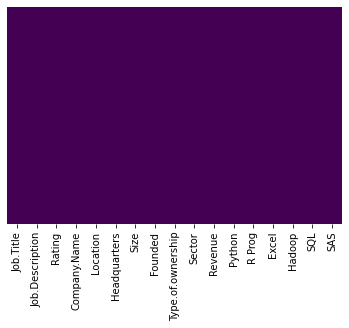

In [260]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [261]:
salary_dataset.isnull().sum()

experience             0
job_description     4418
job_desig              0
job_type           15005
key_skills             1
location               0
salary                 0
dtype: int64

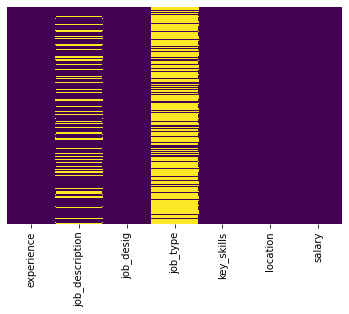

In [262]:
sns.heatmap(salary_dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [73]:
#Aggregating skills into single column for df dataset
#df['Skill'] = df[df.columns[13:18]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
#df.head()

In [377]:
#Selecting only Cities where large number of jobs are posted.
cities = ['Ahmedabad','Bengaluru','Chennai','Chandigarh','Gandhinagar','Hyderabad','Indore','Kolkata','Jaipur','Kochi','Mumbai','NCR','Pune']

salary_dataset = salary_dataset[salary_dataset['location'].isin(cities)]

In [378]:
#Converting Experience which were initially in STRING Format to Integer
#Adding another column as Average Experience to both the datasets.
salary_dataset['experience'] = salary_dataset['experience'].str.replace(' yrs','')


salary_dataset[['min_experience','max_experience']] = salary_dataset['experience'].str.split("-",1,expand=True)
salary_dataset[['min_experience','max_experience']] = salary_dataset[['min_experience','max_experience']].astype(int)
salary_dataset.drop('experience',axis=1,inplace=True)
salary_dataset['experience'] = (salary_dataset['min_experience'] + salary_dataset['max_experience'])/2

In [379]:
#Converting Salary which were initially in STRING Format to Integer
#Adding another column as Average Salary.
salary_dataset[['min_salary','max_salary']] = salary_dataset['salary'].str.split("to",1,expand=True)
salary_dataset[['min_salary','max_salary']] = salary_dataset[['min_salary','max_salary']].astype(int)
salary_dataset.drop('salary',axis=1,inplace=True)
salary_dataset['salary'] = (salary_dataset['min_salary'] + salary_dataset['max_salary'])/2

In [224]:
salary_dataset

,Unnamed: 0,job_description,job_desig,job_type,key_skills,location,company_name_encoded,min_experience,max_experience,experience,min_salary,max_salary,salary
3,3,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,313,7,10,8.5,10,15,12.5
7,7,Qualified Chartered Accountant with 1-3 yrs of...,Manager - Internal Audit - CA - Big4,NaN,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,1793,6,10,8.0,6,10,8.0
13,13,- Knowledge of big data concepts and hands-on ...,Analytics Specialist - Data Science & Big Data,Analytics,"Data Science, Machine Learning, R, Big Data, P...",Mumbai,4479,2,4,3.0,6,10,8.0
16,16,- 2+ years of hands-on experience with the Had...,Hadoop Developer - Rdbms/netezza/oracle,NaN,"Hadoop, HBase, Digital Marketing, Netezza, Uni...",Bengaluru,3998,5,8,6.5,6,10,8.0
17,17,3+ years experience performing financial and a...,Business Finance Partner,NaN,"Business Finance, Financial Control, Business ...",Bengaluru,1548,3,6,4.5,10,15,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19796,19796,2.\tShould have good communication skills;1.\t...,Executive Custome Executive (merchandising ),NaN,"HTML, XML, C, Communication Skills",Pune,838,1,3,2.0,0,3,1.5
19797,19797,NaN,"Director, Medical Coding Training",NaN,"Medical Coding, ICD - 10, US Healthcare, RCM, ...",Hyderabad,2245,12,18,15.0,15,25,20.0
19799,19799,Annuities Domain experience is mandatory;Work ...,PM- C#/ .Net ( Annuity/ Insurance Domain),NaN,"SQL Server, VB.NET, C#, .Net, C#.Net, Oracle S...",Hyderabad,4272,8,13,10.5,15,25,20.0
19800,19800,- By plugging into our market-leading global n...,Consultant - Internal Audit,NaN,"accounting, internal audit, auditing, risk adv...",Pune,1793,1,3,2.0,10,15,12.5


In [380]:
# First, let's define the titles we want to find out.
# "manage" is meant to catch both manager and management 
# "dev" is likewise meant to catch both dev (short) and developer (long) 

titles = ['head', 'senior', 'junior',
          'manage', 'dev', 'research', 'engineer']


# Then we check for each job_desig whether it contains the title as a substring

title_dict = {}
for title in titles:
    title_dict[title] = salary_dataset['job_desig'].str.lower().str.contains(title)


title_df = pd.DataFrame(title_dict)

# Add one column to indicate job postings without any of those titles
# (consider this a baseline/"other"/"unknown" type-of-stuff category)

title_df['no_titles'] = (title_df.sum(axis = 1) == 0).astype(bool)
title_df

,head,senior,junior,manage,dev,research,engineer,no_titles
3,False,False,False,True,False,False,True,False
7,False,False,False,True,False,False,False,False
13,False,False,False,False,False,False,False,True
16,False,False,False,False,True,False,False,False
17,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
19796,False,False,False,False,False,False,False,True
19797,False,False,False,False,False,False,False,True
19799,False,False,False,False,False,False,False,True
19800,False,False,False,False,False,False,False,True


In [381]:
# Now we merge the dataframes together ...
title_df['salary'] = salary

# ... and reshape it to long-form ...
title_df_plot = title_df.melt('salary').rename(columns={'variable': 'title', 'value': 'contains'})

# ... and remove rows where contains == False because we already handle the no_titles category ...
title_df_plot = title_df_plot[title_df_plot['contains']][['salary', 'title']]

# ... and finally plot it!
import seaborn as sns
box = sns.violinplot(data = title_df_plot, x = 'salary', y = 'title')

# (this just manages the size)
sns.set(rc = {'figure.figsize': (8, 8)})

# (this just manages the range)
box.set(xlim = (-7.5, 50))

# (this just adds annotation on how many job postings per title)
title_count = title_df.sum(axis = 0)[0: -1]
for x, count in enumerate(title_count):
    box.annotate(str(int(count)), xy = (50, x), verticalalignment = 'center', horizontalalignment = 'right')

NameError: ignored

The graph shows that jobs with Head title pays distinctively higher than other titles.

Jobs with title Junior pays distinctively less. (Seemingly most of them are on 0 to 3 lakh range; none in 25 to 50 lakh range). Research looks like it also slightly pays less as well, but not as severe.

The other titles, however, does not show very much of a difference to one another and to jobs with no specified titles. Even jobs with title Senior does not differ much visually here!

In [384]:
#Renaming Location names in both the Dataframe to make data more consistent
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Ahmedabad.*$)','Ahmedabad')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Bengaluru.*$)','Bengaluru')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Chennai.*$)','Chennai')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Chandigarh.*$)','Chandigarh')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*NCR.*$)','Delhi')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Delhi.*$)','Delhi')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Gurgaon.*$)','Gurgaon')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Gandhinagar.*$)','Gandhinagar')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Hyderabad.*$)','Hyderabad')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Indore.*$)','Indore')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Kolkata.*$)','Kolkata')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Jaipur.*$)','Jaipur')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Kerala.*$)','Kochi')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Kochi.*$)','Kochi')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Mumbai.*$)','Mumbai')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Noida.*$)','Noida')
salary_dataset['location'] = salary_dataset.location.str.replace(r'(^.*Pune.*$)','Pune')

'''
df['Location'] = df.Location.str.replace(r'(^.*Ahmedabad.*$)','Ahmedabad')
df['Location'] = df.Location.str.replace(r'(^.*Bengaluru.*$)','Bengaluru')
df['Location'] = df.Location.str.replace(r'(^.*Chennai.*$)','Chennai')
df['Location'] = df.Location.str.replace(r'(^.*Chandigarh.*$)','Chandigarh')
df['Location'] = df.Location.str.replace(r'(^.*NCR.*$)','Delhi')
df['Location'] = df.Location.str.replace(r'(^.*Delhi.*$)','Delhi')
df['Location'] = df.Location.str.replace(r'(^.*Gurgaon.*$)','Gurgaon')
df['Location'] = df.Location.str.replace(r'(^.*Gandhinagar.*$)','Gandhinagar')
df['Location'] = df.Location.str.replace(r'(^.*Hyderabad.*$)','Hyderabad')
df['Location'] = df.Location.str.replace(r'(^.*Indore.*$)','Indore')
df['Location'] = df.Location.str.replace(r'(^.*Kolkata.*$)','Kolkata')
df['Location'] = df.Location.str.replace(r'(^.*Jaipur.*$)','Jaipur')
df['Location'] = df.Location.str.replace(r'(^.*Kerala.*$)','Kochi')
df['Location'] = df.Location.str.replace(r'(^.*Kochi.*$)','Kochi')
df['Location'] = df.Location.str.replace(r'(^.*Mumbai.*$)','Mumbai')
df['Location'] = df.Location.str.replace(r'(^.*Noida.*$)','Noida')
df['Location'] = df.Location.str.replace(r'(^.*Pune.*$)','Pune')'''

"\ndf['Location'] = df.Location.str.replace(r'(^.*Ahmedabad.*$)','Ahmedabad')\ndf['Location'] = df.Location.str.replace(r'(^.*Bengaluru.*$)','Bengaluru')\ndf['Location'] = df.Location.str.replace(r'(^.*Chennai.*$)','Chennai')\ndf['Location'] = df.Location.str.replace(r'(^.*Chandigarh.*$)','Chandigarh')\ndf['Location'] = df.Location.str.replace(r'(^.*NCR.*$)','Delhi')\ndf['Location'] = df.Location.str.replace(r'(^.*Delhi.*$)','Delhi')\ndf['Location'] = df.Location.str.replace(r'(^.*Gurgaon.*$)','Gurgaon')\ndf['Location'] = df.Location.str.replace(r'(^.*Gandhinagar.*$)','Gandhinagar')\ndf['Location'] = df.Location.str.replace(r'(^.*Hyderabad.*$)','Hyderabad')\ndf['Location'] = df.Location.str.replace(r'(^.*Indore.*$)','Indore')\ndf['Location'] = df.Location.str.replace(r'(^.*Kolkata.*$)','Kolkata')\ndf['Location'] = df.Location.str.replace(r'(^.*Jaipur.*$)','Jaipur')\ndf['Location'] = df.Location.str.replace(r'(^.*Kerala.*$)','Kochi')\ndf['Location'] = df.Location.str.replace(r'(^.*Kochi

In [385]:
df['Type.of.ownership'] = df["Type.of.ownership"].str.replace(r'(^.*Public.*$)','Public')
df['Type.of.ownership'] = df["Type.of.ownership"].str.replace(r'(^.*Private.*$)','Private')

AttributeError: ignored

In [386]:
salary_dataset

,job_description,job_desig,job_type,key_skills,location,min_experience,max_experience,experience,min_salary,max_salary,salary
3,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,7,10,8.5,10,15,12.5
7,Qualified Chartered Accountant with 1-3 yrs of...,Manager - Internal Audit - CA - Big4,NaN,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,6,10,8.0,6,10,8.0
13,- Knowledge of big data concepts and hands-on ...,Analytics Specialist - Data Science & Big Data,Analytics,"Data Science, Machine Learning, R, Big Data, P...",Mumbai,2,4,3.0,6,10,8.0
16,- 2+ years of hands-on experience with the Had...,Hadoop Developer - Rdbms/netezza/oracle,NaN,"Hadoop, HBase, Digital Marketing, Netezza, Uni...",Bengaluru,5,8,6.5,6,10,8.0
17,3+ years experience performing financial and a...,Business Finance Partner,NaN,"Business Finance, Financial Control, Business ...",Bengaluru,3,6,4.5,10,15,12.5
...,...,...,...,...,...,...,...,...,...,...,...
19796,2.\tShould have good communication skills;1.\t...,Executive Custome Executive (merchandising ),NaN,"HTML, XML, C, Communication Skills",Pune,1,3,2.0,0,3,1.5
19797,NaN,"Director, Medical Coding Training",NaN,"Medical Coding, ICD - 10, US Healthcare, RCM, ...",Hyderabad,12,18,15.0,15,25,20.0
19799,Annuities Domain experience is mandatory;Work ...,PM- C#/ .Net ( Annuity/ Insurance Domain),NaN,"SQL Server, VB.NET, C#, .Net, C#.Net, Oracle S...",Hyderabad,8,13,10.5,15,25,20.0
19800,- By plugging into our market-leading global n...,Consultant - Internal Audit,NaN,"accounting, internal audit, auditing, risk adv...",Pune,1,3,2.0,10,15,12.5


In [271]:
df

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
0,Data Scientist,Site Name: India - Karnataka - Bangalore\r\nPo...,3.9,GSK,Bengaluru,"Brentford, United Kingdom",10000+ employees,1830,Public,Biotech & Pharmaceuticals,500+ billion (INR),1,0,0,1,0,0
1,Data Scientist,Overview\r\n\r\n\r\nWe have an exciting opport...,4.0,Quanticate,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Private,Biotech & Pharmaceuticals,1 to 5 billion (INR),1,0,0,0,0,1
2,Data Scientist,Provide analytical insights into emerging prob...,3.5,PayPal,Bengaluru,"San Jose, CA",10000+ employees,1998,Public,Information Technology,500+ billion (INR),1,0,0,0,1,1
3,Data Scientist,"At Amazon, we strive to be most customer-centr...",4.2,Amazon,Hyderabad,"Seattle, WA",10000+ employees,1994,Public,Information Technology,500+ billion (INR),1,0,1,0,1,0
4,Data Scientist,"When everything's connected, how we connect is...",3.3,TTEC,Hyderabad,"Englewood, CO",10000+ employees,1982,Public,Business Services,100 to 500 billion (INR),1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Data Scientist,Position: Research Associate / Scientist\r\n\r...,4.7,String Bio,Bengaluru,"Bengaluru, India",1 to 50 employees,-1,Private,-1,-1,0,0,1,0,0,0
881,Data Scientist,Role and responsibilities:\r\nMost of the expe...,4.3,Think Analytics India,Mumbai,"Mumbai, India",1 to 50 employees,-1,Private,-1,-1,0,0,0,0,0,1
882,Data Scientist,Understand the project requirements and delive...,-1.0,WDB Inida Private Limited,Hyderabad,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0
883,Data Scientist,Worlds largest investment bank is looking to s...,4.0,The Edge Asia,Mumbai,"Hong Kong, Hong Kong",1 to 50 employees,2013,Private,Business Services,-1,1,0,0,0,0,0


In [387]:
#Filling null values with appropriate MESSAGE
salary_dataset['job_type'].fillna(value='Not Specified', inplace=True)
salary_dataset['job_description'].fillna(value='Not Specified', inplace=True)
salary_dataset['key_skills'].fillna(value='Not Specified', inplace=True)


salary_dataset.reset_index(drop=True, inplace=True)


**UNIQUE VALUES**

In [113]:
s1= df['Job.Title'].nunique()
s2= df['Rating'].nunique()
s3= df['Company.Name'].nunique()
s4= df['Headquarters'].nunique()
s5= df['Type.of.ownership'].nunique()
s7= df['Sector'].nunique()



In [115]:
print(s1,s2,s3,s4,s5,s7)

4 32 453 170 4 21


**VISUALIZATIONS**

In [275]:
df[df['Size'].str.contains("-1", na=False)]


,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
9,Data Scientist,Summary\r\nMiko is a Mumbai based advanced con...,-1.0,Emotix Miko,-1,-1,-1,-1,-1,-1,-1,1,0,1,0,1,0
10,Data Scientist,Summary\r\nMiko is a Mumbai based advanced con...,-1.0,Emotix Miko,-1,-1,-1,-1,-1,-1,-1,1,0,1,0,1,0
11,Data Scientist,Summary\r\nMiko is a Mumbai based advanced con...,-1.0,Emotix Miko,-1,-1,-1,-1,-1,-1,-1,1,0,1,0,1,0
53,Data Scientist,Work with clients to identify opportunities fo...,-1.0,Germane Analytics Pvt Ltd,Bengaluru,"Bengaluru, India",-1,-1,Private,-1,-1,1,0,1,1,1,0
59,Data Scientist,Design and lead the development of various mac...,4.5,KhataBook,Bengaluru,"Bangalore Rural, India",-1,-1,Private,-1,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,Data Scientist,Understand the project requirements and delive...,-1.0,WDB Inida Private Limited,Hyderabad,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0
861,Machine Learning Engineer,We are looking for a machine learning engineer...,-1.0,Matelabs Innovations Pvt. Ltd.,Bengaluru,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0
876,Data Scientist,EXPERIENCE:\r\n2+years\r\nJOB DESCRIPTION:\r\n...,-1.0,Copiousminds,Mumbai,"Mumbai, India",-1,-1,Private,-1,-1,0,0,1,1,1,1
879,Data Scientist,"If you are interested, please email your resum...",4.7,Quantzig,Bengaluru,"London, United Kingdom",-1,-1,Private,Business Services,-1,1,0,1,0,1,1


In [299]:
df[df['Revenue'].str.contains("-1", na=False)]

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
12,Data Engineer,"About SpringML\r\n\r\nAt SpringML, we are all ...",4.4,SpringML,Hyderabad,"Pleasanton, CA",1 to 50 employees,2015,Private,Information Technology,-1,1,0,0,0,0,0
18,Data Scientist,"NLP, ML, Python/R, Hadoop, strong mathematical...",4.2,TEQNirvana,Mumbai,"Bengaluru, India",1 to 50 employees,2005,Private,Business Services,-1,1,0,0,1,0,0
22,Data Scientist,Job Description\r\nWhat will a 'Data Scientist...,4.0,MTW LABS,Hyderabad,"Hyderabad, India",1 to 50 employees,2016,Private,Information Technology,-1,1,0,1,0,0,1
23,Data Scientist,The required skills are :\r\nPost graduate deg...,4.0,Tech27 Systems Ltd.,Kozhikode,"Aberdeen, United Kingdom",51 to 200 employees,-1,Private,Information Technology,-1,1,0,0,0,0,0
25,Data Scientist,Do you feel passionately about solving problem...,4.1,Analytics Vidhya,Gurgaon,"Gurgaon, India",1 to 50 employees,-1,Private,-1,-1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,Data Analyst,Share\r\n\r\nJob Description:\r\n\r\nThis role...,3.3,Cleartrip,Bengaluru,"Mumbai, India",501 to 1000 employees,2006,Private,Travel & Tourism,-1,1,0,1,0,1,0
878,Data Analyst,Work closely with business teams to identify s...,3.0,FLEXILOANS TECHNOLOGIES,Mumbai,"Mumbai, India",201 to 500 employees,2016,Private,Finance,-1,0,0,0,0,1,0
880,Data Scientist,Position: Research Associate / Scientist\r\n\r...,4.7,String Bio,Bengaluru,"Bengaluru, India",1 to 50 employees,-1,Private,-1,-1,0,0,1,0,0,0
881,Data Scientist,Role and responsibilities:\r\nMost of the expe...,4.3,Think Analytics India,Mumbai,"Mumbai, India",1 to 50 employees,-1,Private,-1,-1,0,0,0,0,0,1


In [296]:
df.drop([17,21,87,195,248,275,284,350,358,399,423,434,437,469,471,472,572,602,632,662,692,722,752,782,812,842,872], inplace=True)

In [277]:
df[df['Job.Title'].str.contains("-1", na=False)]

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS


**COMPANIES HAVING HIGHEST JOB OPENINGS**

,count,Company
ZoomRx,22,ZoomRx
Sanofi,12,Sanofi
String Bio,12,String Bio
Amazon,12,Amazon
Walmart,12,Walmart
Citi,12,Citi
EY,12,EY
Magna Infotech (India),11,Magna Infotech (India)
Think Analytics India,11,Think Analytics India
Happy Marketer,11,Happy Marketer


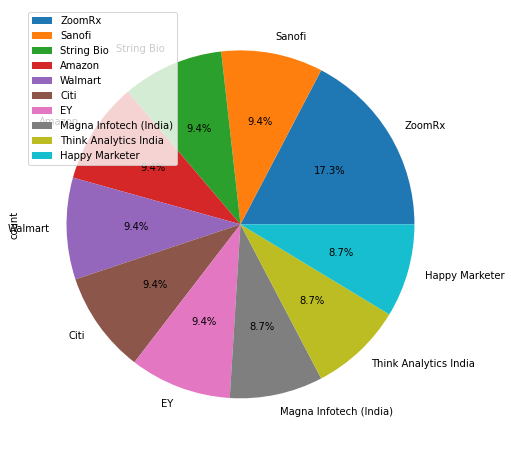

In [300]:

top1=pd.DataFrame(df['Company.Name'].value_counts()[:10])
top1["Company"]=top1.index
top1=top1.rename(columns={'Company.Name':'count'})
top1.plot.pie(y="count",figsize=(35,8),subplots=True,autopct='%1.1f%%',)
plt.legend(loc="upper left")

top1

,Company.Name,Location,Job.Title
411,ZoomRx,Chennai,22
318,Sanofi,Mumbai,12
295,Quantzig,Bengaluru,12
402,Walmart,Bengaluru,12
349,String Bio,Bengaluru,12
...,...,...,...
154,Gauge Data Solutions,Noida,1
153,Ganit,Bengaluru,1
152,GSN Games,Bengaluru,1
149,GO-JEK,Bengaluru,1


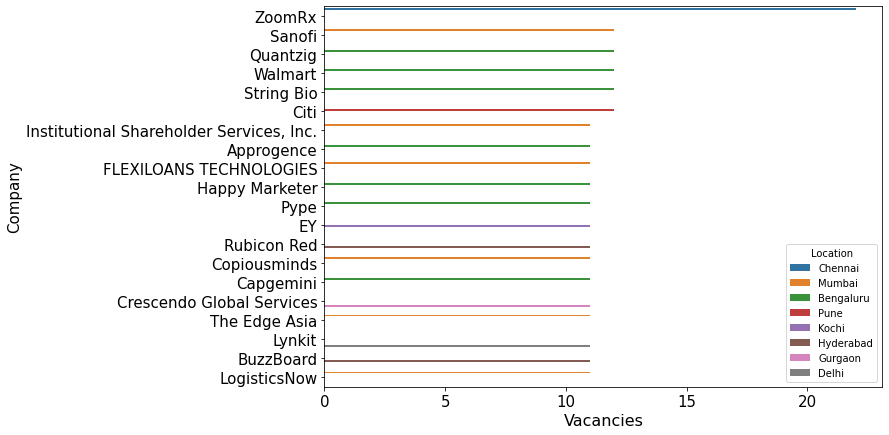

In [150]:
df1=df.groupby(by=["Company.Name","Location"]).size().reset_index(name="Job.Title").sort_values(by="Job.Title",ascending=False)


plt.figure(figsize=(10,7))
sb.barplot(y="Company.Name",x="Job.Title",hue="Location",data=df1.head(20))
plt.yticks(size=15)
plt.ylabel("Company",size=15)
plt.xlabel("Vacancies",size=16)
plt.xticks(size=15)

df1

**PROFESSIONS HAVING HIGHEST REVIEWS:**

,Company.Name,Job.Title,Rating
358,String Bio,Data Scientist,56.4
302,Quantzig,Data Scientist,56.4
231,Lynkit,Data Analyst,55.0
93,Crescendo Global Services,Data Scientist,50.6
173,Happy Marketer,Data Analyst,48.4
...,...,...,...
193,Imurgence,Data Scientist,-1.0
197,Inference Labs,Data Scientist,-2.0
69,CareerXperts,Data Scientist,-3.0
34,Approgence,Data Scientist,-11.0


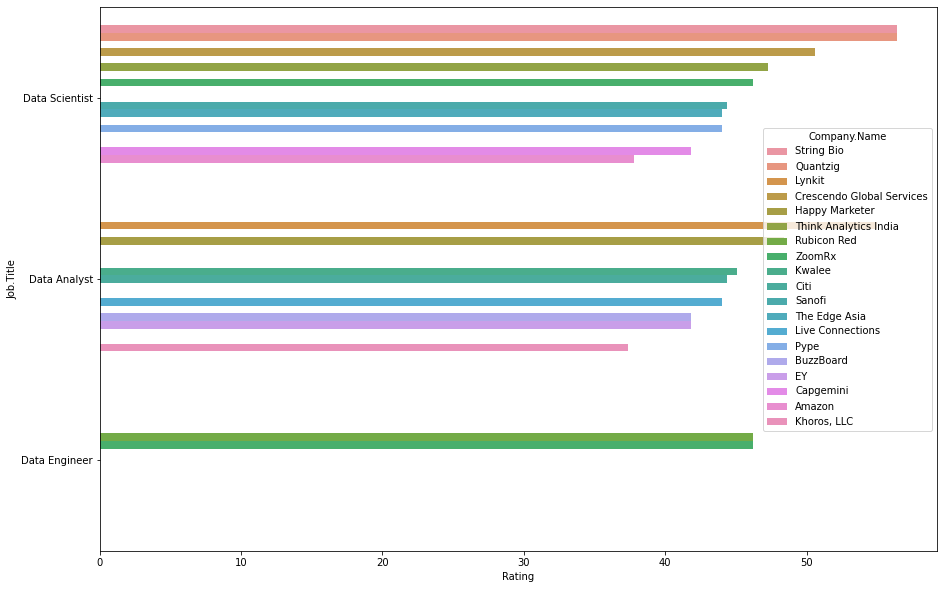

In [151]:
df0=df.groupby(by=["Company.Name","Job.Title"])["Rating"].sum().reset_index().sort_values(by="Rating",ascending=False)
plt.figure(figsize=(15,10))
sb.barplot(y="Job.Title",x="Rating",data=df0.head(20),hue="Company.Name")
df0

**PROFESSION WITH MAXIMUM NUMBER OF OPENINGS:**

,count,Position
Data Scientist,480,Data Scientist
Data Analyst,226,Data Analyst
Data Engineer,77,Data Engineer
Machine Learning Engineer,23,Machine Learning Engineer


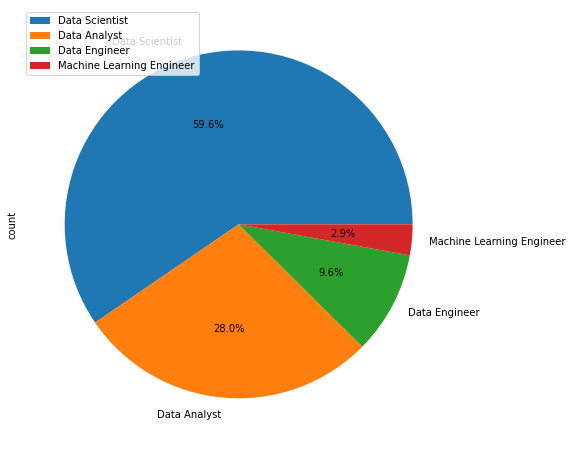

In [152]:
top=pd.DataFrame(df['Job.Title'].value_counts()[:10])
top["Position"]=top.index
top=top.rename(columns={'Job.Title':'count'})
top.plot.pie(y="count",figsize=(35,8),subplots=True,autopct='%1.1f%%',)
plt.legend(loc="upper left")

top

,Job.Title,Job vacancies
2,Data Scientist,480
0,Data Analyst,226
1,Data Engineer,77
3,Machine Learning Engineer,23


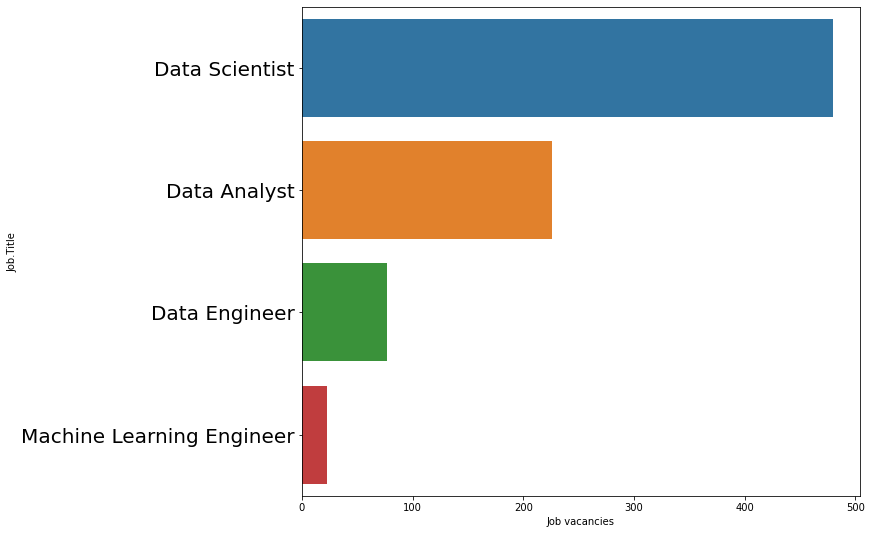

In [153]:
df2=df.groupby(by="Job.Title").size().reset_index(name="Job vacancies").sort_values(by="Job vacancies",ascending=False)
plt.figure(figsize=(10,9))
sb.barplot(y="Job.Title",x="Job vacancies",data=df2.head(20))
plt.yticks(size=20)
df2.head(20)

****MAXIMUM NUMBER OF JOB OPERNINGS WITH RESPECT TO DIFFERENT STATES****

,count,City
Bengaluru,361,Bengaluru
Mumbai,132,Mumbai
Pune,63,Pune
Chennai,60,Chennai
Hyderabad,57,Hyderabad
Gurgaon,33,Gurgaon
Delhi,21,Delhi
India,18,India
Kochi,13,Kochi
Noida,12,Noida


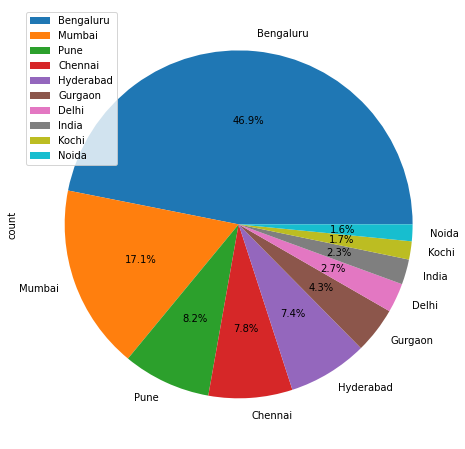

In [154]:
top2=pd.DataFrame(df['Location'].value_counts()[:10])
top2["City"]=top2.index
top2=top2.rename(columns={'Location':'count'})
top2.plot.pie(y="count",figsize=(35,8),subplots=True,autopct='%1.1f%%',)
plt.legend(loc="upper left")

top2

,Job.Title,Location,vacancy
25,Data Scientist,Bengaluru,225
1,Data Analyst,Bengaluru,87
40,Data Scientist,Mumbai,85
15,Data Engineer,Bengaluru,41
9,Data Analyst,Mumbai,40
27,Data Scientist,Chennai,34
13,Data Analyst,Pune,30
43,Data Scientist,Pune,27
30,Data Scientist,Gurgaon,27
31,Data Scientist,Hyderabad,26


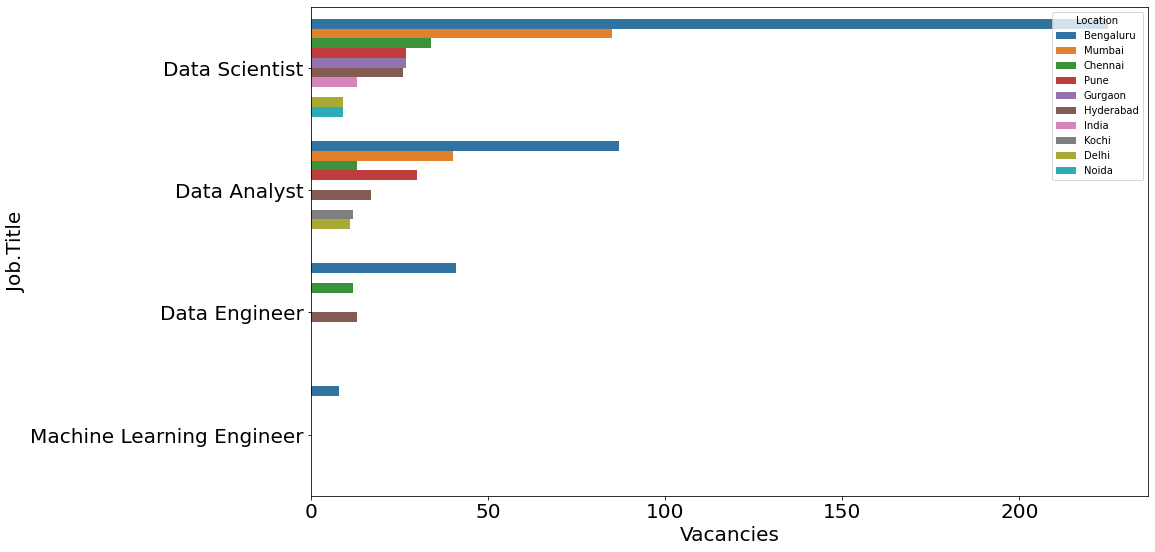

In [155]:
df3=df.groupby(by=["Job.Title","Location"]).size().reset_index(name="vacancy").sort_values(by="vacancy",ascending=False)
plt.figure(figsize=(15,9))
sb.barplot(x="vacancy",y="Job.Title",data=df3.head(20),hue="Location")
plt.yticks(size=20)
plt.ylabel("Job.Title",size=20)
plt.xlabel("Vacancies",size=20)
plt.xticks(size=20)
df3.head(20)

**Where Data Scientists are required?**

In [156]:
#Plotting Job Count by each city
location_df = salary_dataset['location'].value_counts()
location_df = location_df.reset_index()
location_df.columns = ['Location','Count']

fig = px.bar(location_df, x='Location', y='Count', color='Count',
            title = '<b>Job Posting Citywise<b>')

fig.update_xaxes(title_text='City')
fig.update_yaxes(title_text='No of Jobs')

py.iplot(fig)

In [159]:
longitude = [12.9716, 19.0760, 18.5204, 13.0827, 17.3850, 28.4020, 23.0225, 22.5726, 30.7333, 9.9312, 26.9124, 22.7196]
latitude = [77.5946, 72.8777, 73.8567, 80.2707, 78.4867, 76.8260, 72.5714, 88.3639, 76.7794, 76.2673, 75.7873, 75.8577]



location_df = location_df.assign(longitude = longitude)
location_df = location_df.assign(latitude = latitude)

In [160]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig1 = px.scatter_mapbox(
                        location_df, 
                        lat=location_df.longitude, 
                        lon=location_df.latitude, 
                        size="Count", 
                        color="Location", 
                        hover_name = "Count",
                        color_continuous_scale=px.colors.colorbrewer.Reds,  
                        size_max=50, 
                        zoom=3)
py.iplot(fig1)

**Salary VS Experience**

In [161]:
fig = px.scatter(salary_dataset, x='experience', y='salary', 
                 size='salary', color='experience',
                title='<b>Experience vs Salary')

fig.update_xaxes(title_text='Experience in Years')
fig.update_yaxes(title_text='Salary in INR (₹) Lakhs')

py.iplot(fig)

# **DATA SCIENTIST JOBS**

> **FILTERING ALL OBJECTS RELATED TO DATA SCIENCE**

In [162]:
Data_scientists=df[(df["Job.Title"]=='Data Scientist')|(df["Job.Title"]=='Senior Data Scientist')|(df["Job.Title"]=='Lead Data Scientist')|(df["Job.Title"]=='Sr. Data Scientist')]
Data_scientists.head()

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
0,Data Scientist,Site Name: India - Karnataka - Bangalore\r\nPo...,3.9,GSK,Bengaluru,"Brentford, United Kingdom",10000+ employees,1830,Public,Biotech & Pharmaceuticals,500+ billion (INR),1,0,0,1,0,0
1,Data Scientist,Overview\r\n\r\n\r\nWe have an exciting opport...,4.0,Quanticate,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Private,Biotech & Pharmaceuticals,1 to 5 billion (INR),1,0,0,0,0,1
2,Data Scientist,Provide analytical insights into emerging prob...,3.5,PayPal,Bengaluru,"San Jose, CA",10000+ employees,1998,Public,Information Technology,500+ billion (INR),1,0,0,0,1,1
3,Data Scientist,"At Amazon, we strive to be most customer-centr...",4.2,Amazon,Hyderabad,"Seattle, WA",10000+ employees,1994,Public,Information Technology,500+ billion (INR),1,0,1,0,1,0
4,Data Scientist,"When everything's connected, how we connect is...",3.3,TTEC,Hyderabad,"Englewood, CO",10000+ employees,1982,Public,Business Services,100 to 500 billion (INR),1,0,1,0,0,1


> **DATA SCIENTIST JOB OPENINGS WITH RESPECT TO DIFFERENT STATES**

,Location,count
2,Bengaluru,225
17,Mumbai,85
4,Chennai,34
20,Pune,27
7,Gurgaon,27
8,Hyderabad,26
9,India,13
5,Delhi,9
19,Noida,9
0,Ahmedabad,5


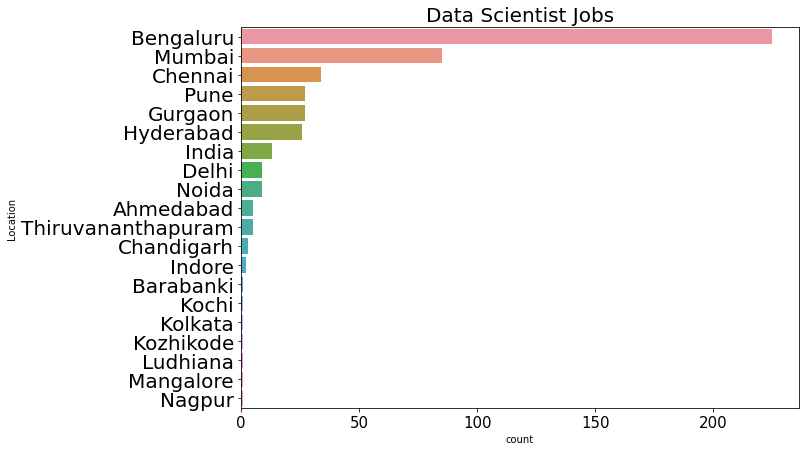

In [163]:
df5=Data_scientists.groupby(by="Location").size().reset_index(name="count").sort_values(by="count",ascending=False)
plt.figure(figsize=(10,7))
plt.yticks(size=20)
sb.barplot(y="Location",x="count",data=df5.head(20))
plt.title("Data Scientist Jobs",size=20)
plt.xticks(size=15)
df5.head(10)

>  **WORD CLOUD**

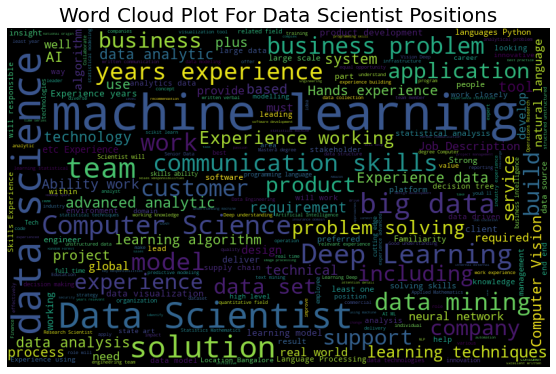

In [164]:
def split_text(texts):
    wordslist=[]
    for word in texts:
        wordslist.append(word.split())
    new_list=[]
    for listt in wordslist:
        new_list=new_list+listt
    text=" ".join(new_list)
    return text 

skills=Data_scientists['Job.Description'].tolist()
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='black', max_words=500, 
                min_font_size = 5).generate(split_text(skills))

plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud Plot For Data Scientist Positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

> **SKILLS REQUIRED**

In [ ]:
df.head(20)
df.drop('Skill',axis=1)

# **MACHINE LEARNING ENGINEER:**

> **FILTERING ALL OBJECTS RELATED TO MACHINE LEARNING ENGINEER**

In [165]:
ML_engineer=df[(df["Job.Title"]=='Machine Learning Engineer')|(df["Job.Title"]=='ML Engineer')]
ML_engineer.head()

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
39,Machine Learning Engineer,Hewlett Packard Enterprise is an industry lead...,4.2,Hewlett Packard Enterprise,Bengaluru,"Palo Alto, CA",10000+ employees,2015,Public,Information Technology,-1,0,0,0,0,0,0
186,Machine Learning Engineer,"Experience: 5+ years\r\n\r\nLocation: Madurai,...",3.7,Techmango Technology Services,Madurai,"Westchester, IL",51 to 200 employees,2014,Public,Information Technology,-1,1,0,0,0,0,0
245,Machine Learning Engineer,Roles &Responsibilities\r\n\r\nA Machine Learn...,5.0,Machstatz,Bengaluru,"Bengaluru, India",1 to 50 employees,2017,Private,Information Technology,10 to 50 million (INR),1,0,1,0,1,0
247,Machine Learning Engineer,Following a year of rapid growth in our open-s...,5.0,Seldon,Bagalur,"Shoreditch, United Kingdom",1 to 50 employees,-1,Private,-1,-1,1,0,0,0,0,0
279,Machine Learning Engineer,IQVIA is the leading human data science compan...,3.6,IQVIA,Bengaluru,"Durham, NC",10000+ employees,2017,Public,Biotech & Pharmaceuticals,100 to 500 billion (INR),1,0,1,0,0,0


> **MACHINE LEARNING ENGINEER JOB OPENINGS WITH RESPECT TO DIFFERENT STATES**

,Location,count
2,Bengaluru,8
11,Pune,3
5,Gurgaon,2
9,Mumbai,2
0,Ahmedabad,1
1,Bagalur,1
3,Chennai,1
4,Delhi,1
6,Hyderabad,1
7,India,1


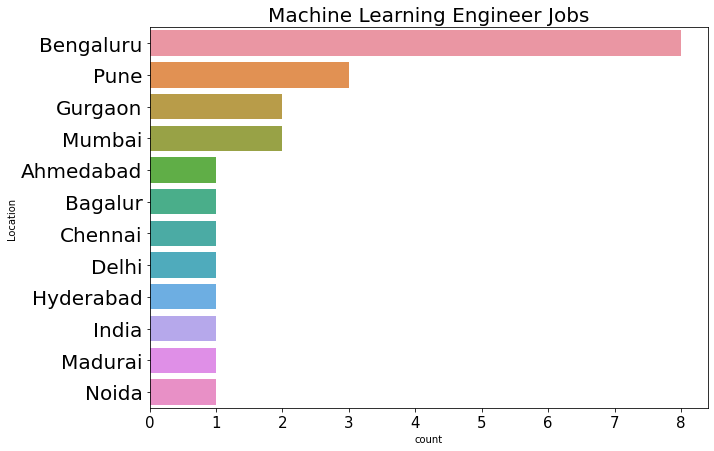

In [167]:
df5=ML_engineer.groupby(by="Location").size().reset_index(name="count").sort_values(by="count",ascending=False)
plt.figure(figsize=(10,7))
plt.yticks(size=20)
sb.barplot(y="Location",x="count",data=df5.head(20))
plt.title("Machine Learning Engineer Jobs",size=20)
plt.xticks(size=15)
df5.head(10)

>  **WORD CLOUD**

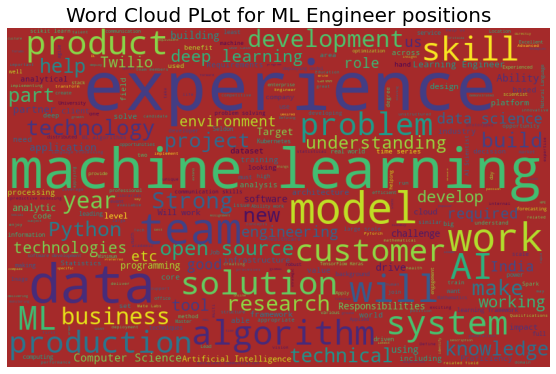

In [168]:
skills_ml_engineer=ML_engineer['Job.Description'].tolist()
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='brown',max_words=300,
                min_font_size = 5).generate(split_text(skills_ml_engineer))

plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for ML Engineer positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

> **SKILLS REQUIRED**

# **DATA ENGINEER**

> **FILTERING ALL OBJECTS RELATED TO DATA ENGINEER**

In [169]:
Data_engineer=df[(df["Job.Title"]=='Data Engineer')]
Data_engineer.head()

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
12,Data Engineer,"About SpringML\r\n\r\nAt SpringML, we are all ...",4.4,SpringML,Hyderabad,"Pleasanton, CA",1 to 50 employees,2015,Private,Information Technology,-1,1,0,0,0,0,0
65,Data Engineer,Data & Analytics (D&A) office is looking for d...,4.2,Cisco Systems,Bengaluru,"San Jose, CA",10000+ employees,1984,Private,Information Technology,500+ billion (INR),1,0,0,0,1,0
80,Data Engineer,We are looking for a Data Engineer who will wo...,3.7,Doubtnut,Gurgaon,"Gurgaon, India",51 to 200 employees,2016,Private,Information Technology,-1,1,0,1,0,1,0
202,Data Engineer,About Snowflake\r\n\r\nSnowflake is growing fa...,4.1,Snowflake,Pune,"San Mateo, CA",1001 to 5000 employees,2012,Private,Information Technology,-1,1,0,0,0,1,0
235,Data Engineer,"Esper is an inventive startup, and the industr...",4.7,Esper,Bengaluru,"Menlo Park, CA",1 to 50 employees,2017,Private,Information Technology,100 to 500 million (INR),1,0,0,0,0,0


> **DATA ENGINEER JOB OPENINGS WITH RESPECT TO DIFFERENT STATES**

,Location,count
0,Bengaluru,41
3,Hyderabad,13
1,Chennai,12
5,Mumbai,5
7,Pune,3


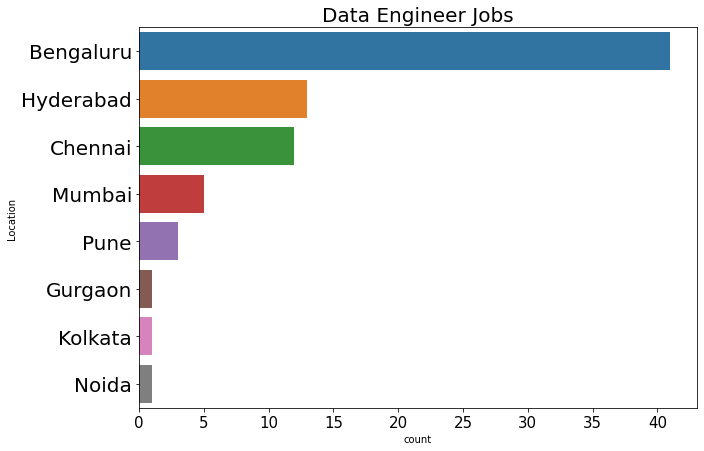

In [170]:
df7=Data_engineer.groupby(by="Location").size().reset_index(name="count").sort_values(by="count",ascending=False)

plt.figure(figsize=(10,7))
plt.yticks(size=20)
sb.barplot(y="Location",x="count",data=df7.head(20))
plt.title("Data Engineer Jobs",size=20)
plt.xticks(size=15)
df7.head()

> **WORD CLOUD**

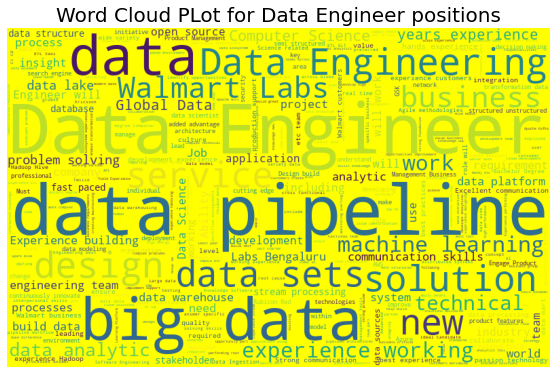

In [171]:
skills_data_engineer=Data_engineer['Job.Description'].tolist()
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='yellow',contour_color='steelblue', max_words=500, 
                min_font_size = 5).generate(split_text(skills_data_engineer))

plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for Data Engineer positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

> **SKILLS REQUIRED**

# **DATA ANALYST**

> **FILTERING ALL OBJECTS RELATED TO DATA ANALYST**

In [172]:
data_analyst=df[(df["Job.Title"]=='analyst|Analyst"')|(df["Job.Title"]=='Data Analyst')]
data_analyst.head()

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
68,Data Analyst,Research Engineer - Data Analytics & Artificia...,4.1,Siemens Healthineers,Bengaluru,"Erlangen, Germany",10000+ employees,1847,Public,Healthcare,500+ billion (INR),0,0,0,0,0,0
134,Data Analyst,Distributed Computing/Data Analytics developer...,3.2,Micro Focus,Bengaluru,"Newbury, United Kingdom",10000+ employees,1976,Public,Information Technology,100 to 500 billion (INR),0,0,0,1,1,0
199,Data Analyst,Job Title:Data Analyst\r\nLocation: Pune\r\nBa...,3.9,Barclays,Pune,"London, United Kingdom",10000+ employees,1690,Public,Finance,500+ billion (INR),0,0,1,0,0,0
206,Data Analyst,Distributed computing & Data Analytics Develop...,3.2,Micro Focus,Bengaluru,"Newbury, United Kingdom",10000+ employees,1976,Public,Information Technology,100 to 500 billion (INR),0,0,0,1,1,0
240,Data Analyst,ABOUT THE ROLE\r\n\r\nToppr is looking for a D...,3.2,Toppr,Mumbai,"Mumbai, India",51 to 200 employees,2013,Private,Education,-1,0,0,1,0,0,0


 **DATA ANALYST JOB OPENINGS WITH RESPECT TO DIFFERENT STATES**

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

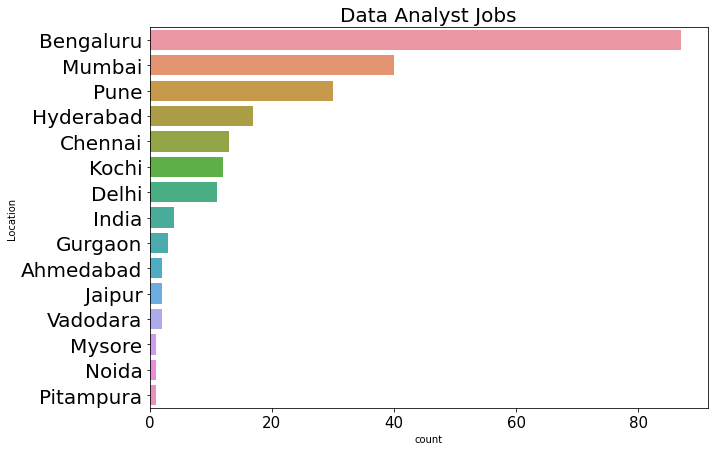

In [173]:
df8=data_analyst.groupby(by="Location").size().reset_index(name="count").sort_values(by="count",ascending=False)
df8.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=20)
sb.barplot(y="Location",x="count",data=df8.head(20))
plt.title("Data Analyst Jobs",size=20)
plt.xticks(size=15)

> **WORDCLOUD**

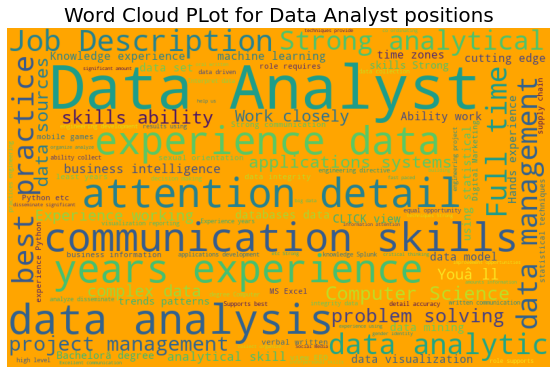

In [174]:
skill_data_analyst=data_analyst['Job.Description'].tolist()
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='orange',max_words=100,  
                min_font_size = 5).generate(split_text(skill_data_analyst))

plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for Data Analyst positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

> **SKILLS REQUIRED**

In [ ]:
df.head()

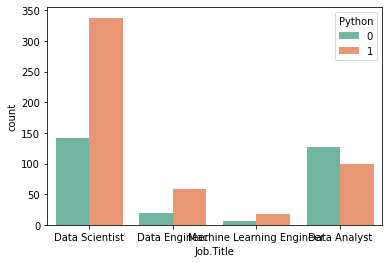

In [175]:
sns.countplot(x ='Job.Title',hue='Python', data = df,palette = "Set2")
 
# Show the plot
plt.show()

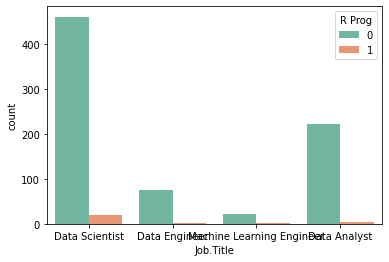

In [176]:
sns.countplot(x ='Job.Title',hue='R Prog', data = df,palette = "Set2")
 
# Show the plot
plt.show()

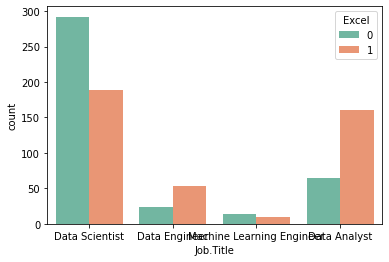

In [177]:
sns.countplot(x ='Job.Title',hue='Excel', data = df,palette = "Set2")
 
# Show the plot
plt.show()

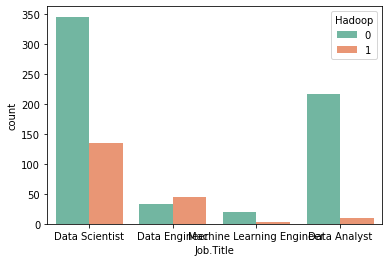

In [178]:
sns.countplot(x ='Job.Title',hue='Hadoop', data = df,palette = "Set2")
 
# Show the plot
plt.show()

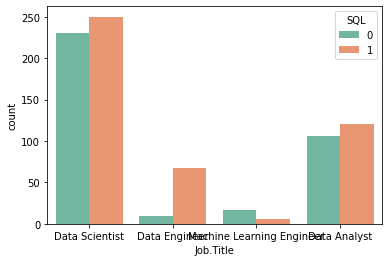

In [179]:
sns.countplot(hue ='SQL',x="Job.Title", data = df,palette = "Set2")
 
# Show the plot
plt.show()

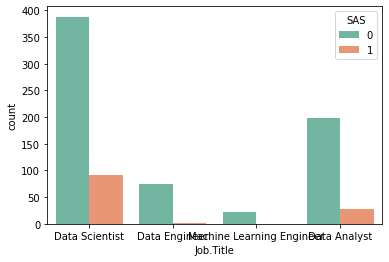

In [180]:
sns.countplot(hue ='SAS',x="Job.Title", data = df,palette = "Set2")
 
# Show the plot
plt.show()

In [ ]:
df.head(20)

**SEGMENTATION**

Socio-Demographic Segmentation

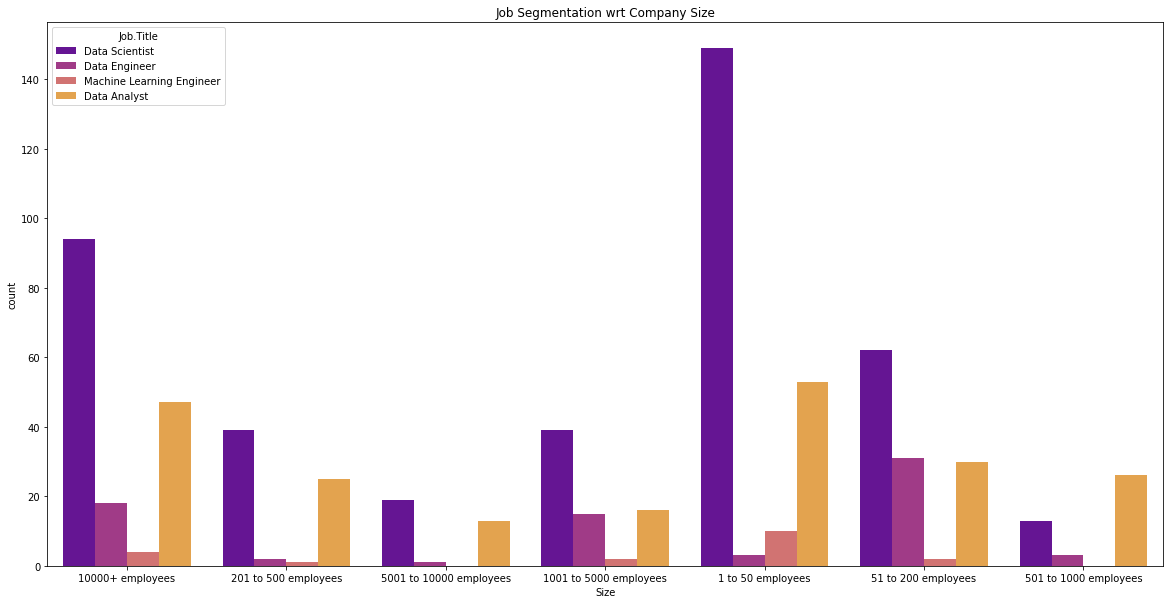

In [301]:
plt.figure(figsize=(20,10))
sns.countplot(x='Size',hue='Job.Title', data=df, palette='plasma')
plt.title("Job Segmentation wrt Company Size")
plt.show()

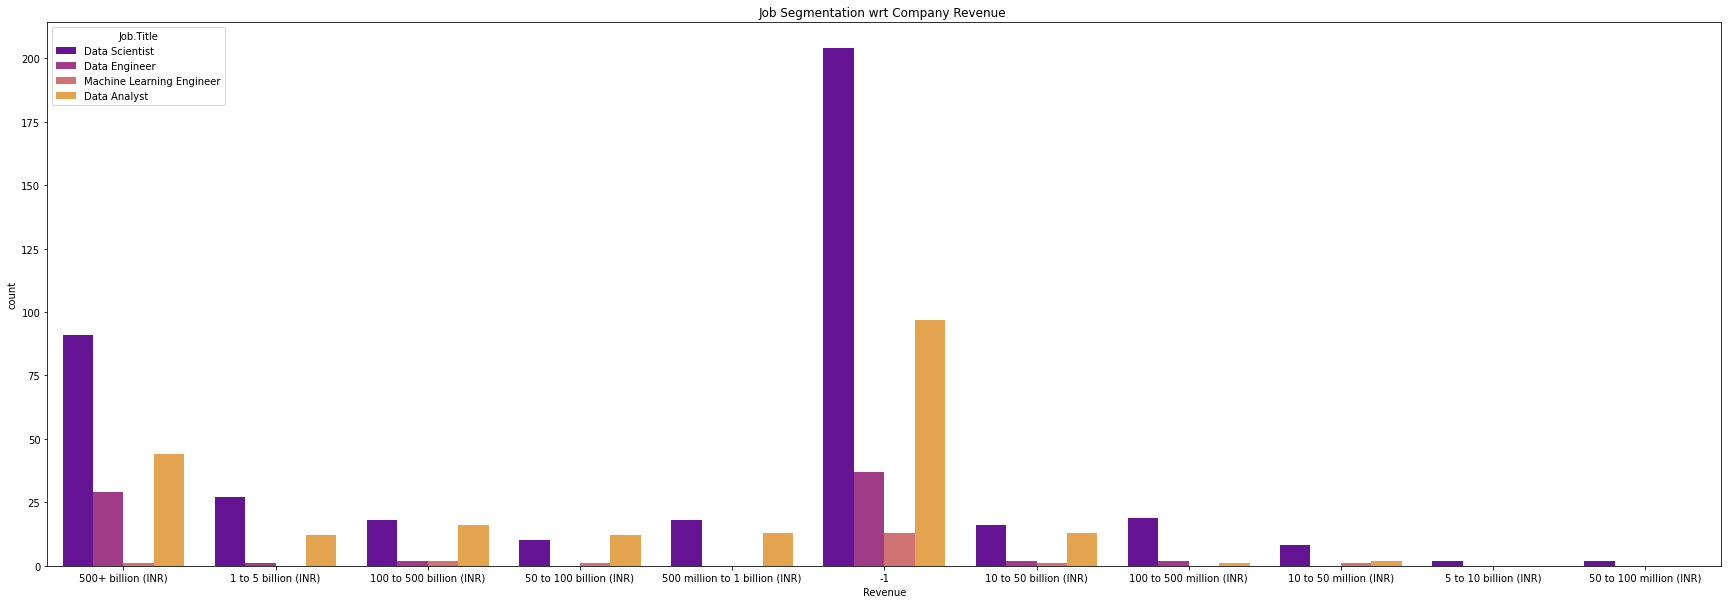

In [302]:
plt.figure(figsize=(30,10))
sns.countplot(x='Revenue',hue='Job.Title', data=df, palette='plasma')
plt.title("Job Segmentation wrt Company Revenue ")
plt.show()

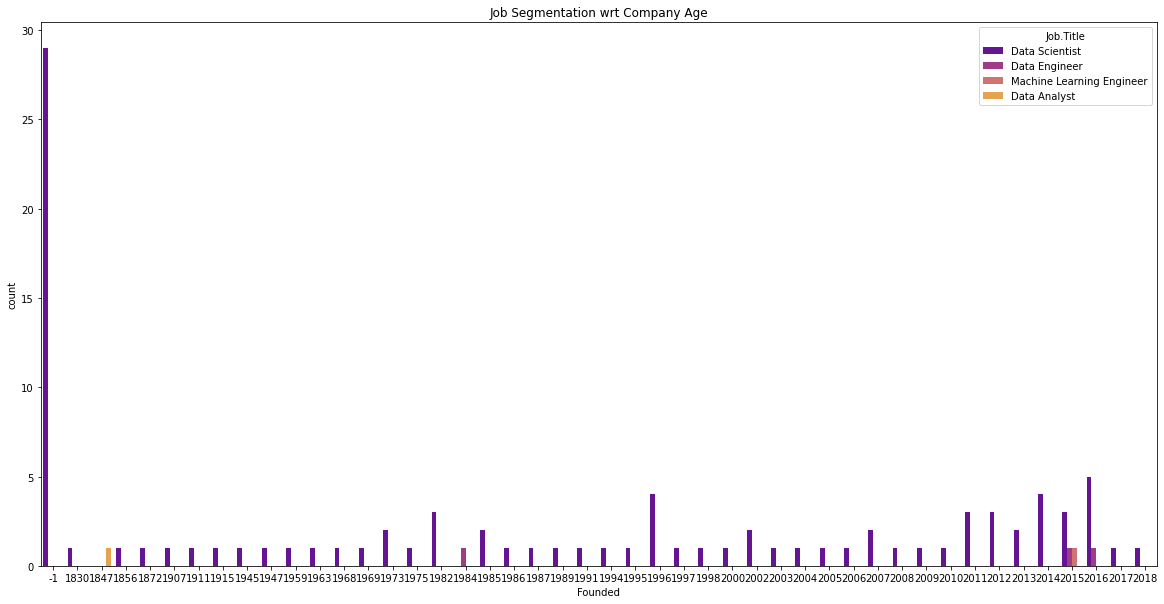

In [303]:
plt.figure(figsize=(20,10))
sns.countplot(x='Founded',hue='Job.Title', data=df.head(100), palette='plasma')
plt.title("Job Segmentation wrt Company Age")
plt.show()

Behavioural Segmentation

Psychographic Segmentation

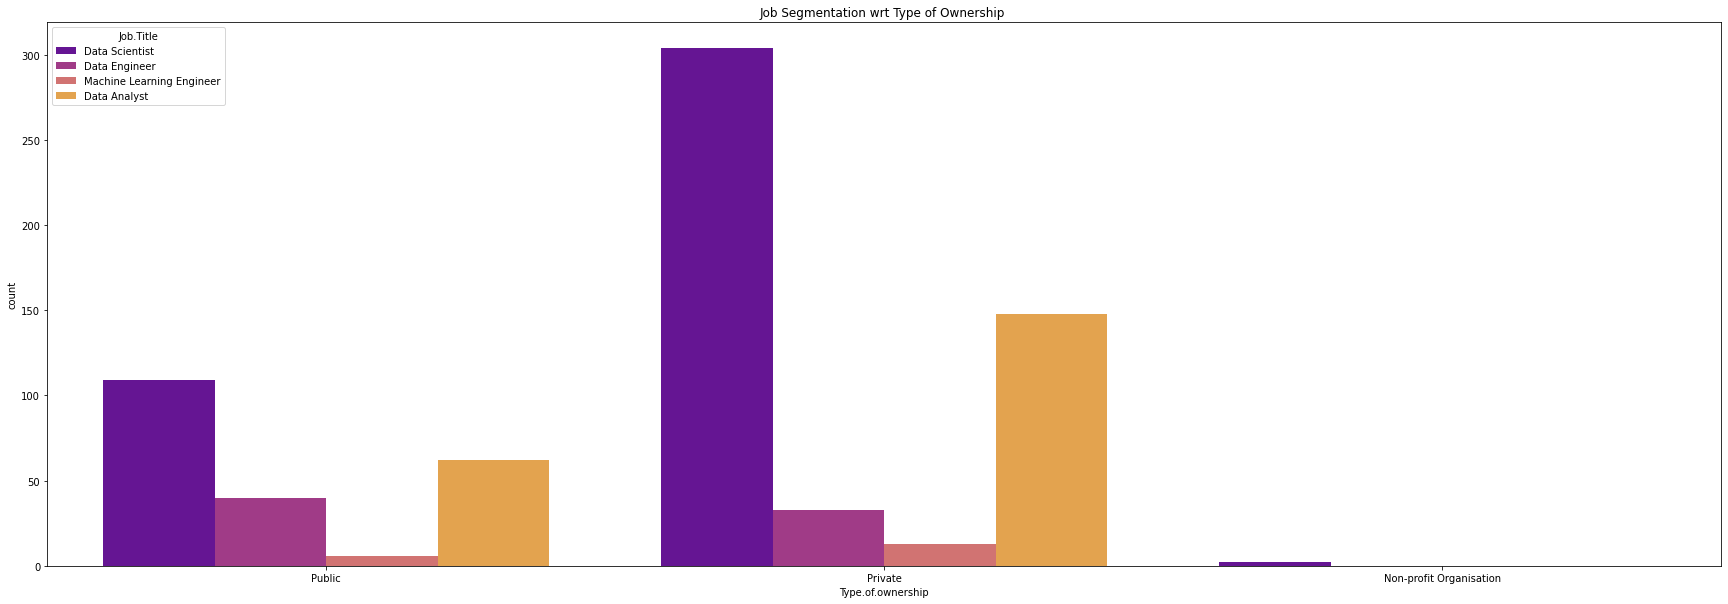

In [304]:
plt.figure(figsize=(30,10))
sns.countplot(x='Type.of.ownership',hue='Job.Title', data=df, palette='plasma')
plt.title("Job Segmentation wrt Type of Ownership ")
plt.show()

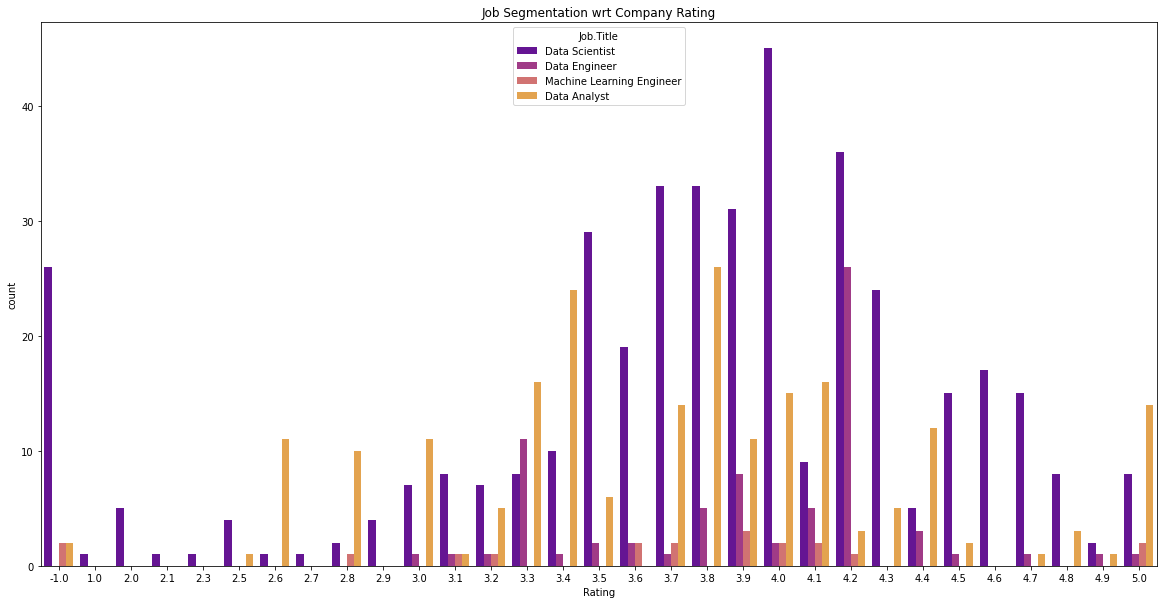

In [306]:
plt.figure(figsize=(20,10))
sns.countplot(x='Rating',hue='Job.Title', data=df, palette='plasma')
plt.title("Job Segmentation wrt Company Rating")
plt.show()

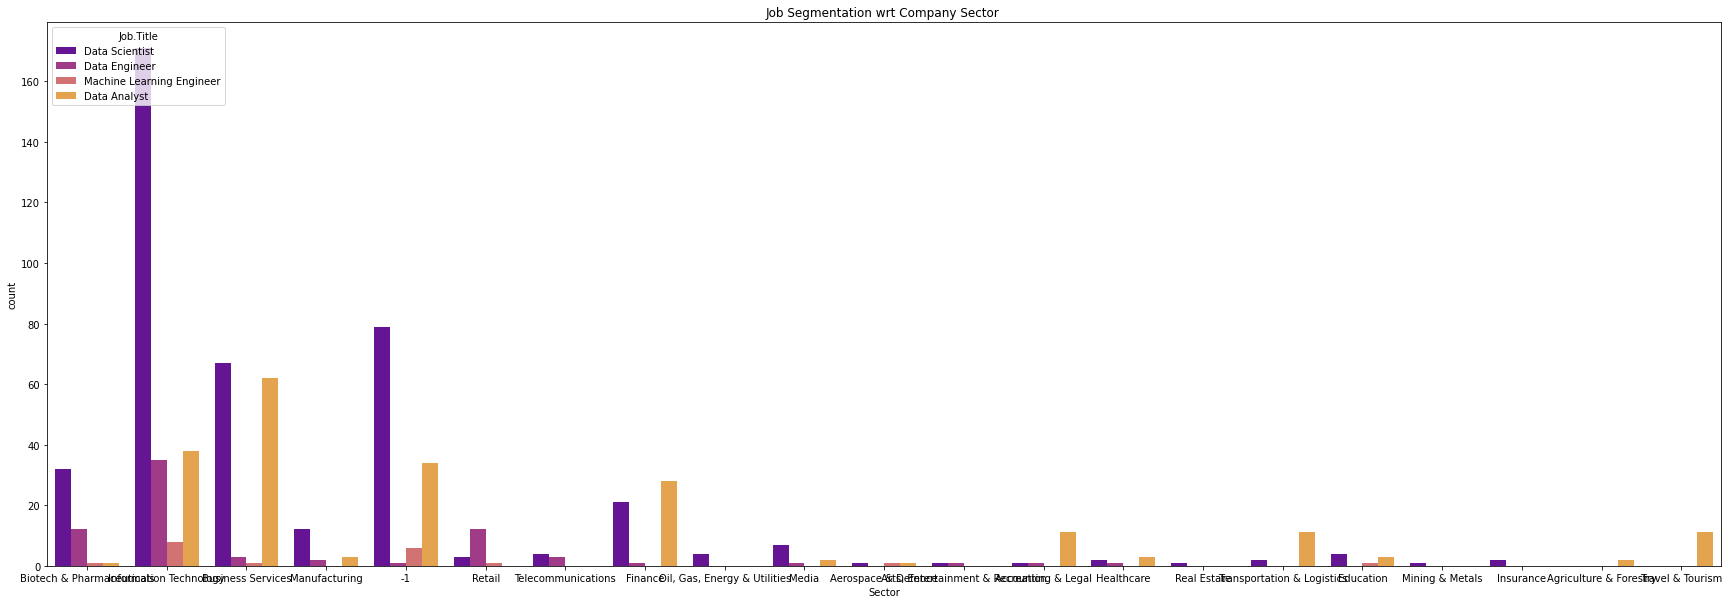

In [308]:
plt.figure(figsize=(30,10))
sns.countplot(x='Sector',hue='Job.Title', data=df, palette='plasma')
plt.title("Job Segmentation wrt Company Sector ")
plt.show()

Geographical Segmentation

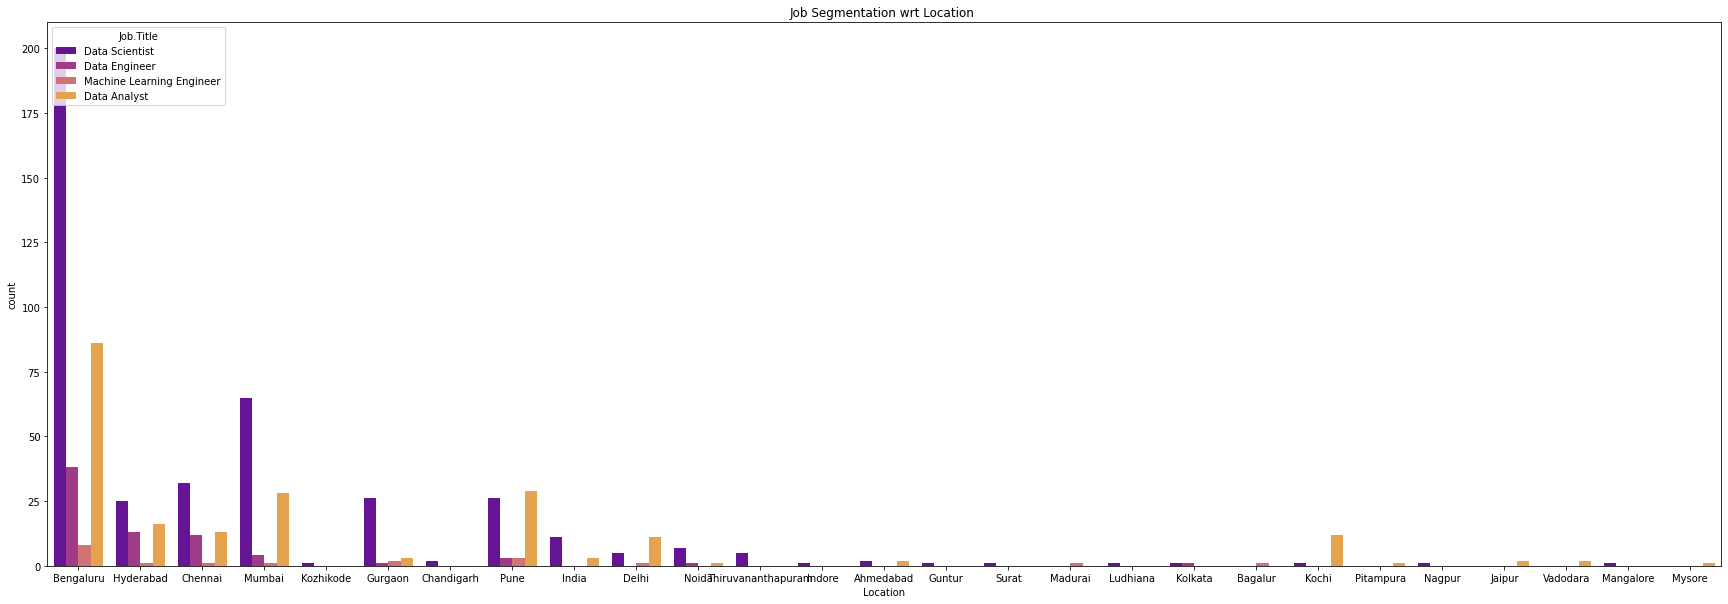

In [309]:
plt.figure(figsize=(30,10))
sns.countplot(x='Location',hue='Job.Title', data=df, palette='plasma')
plt.title("Job Segmentation wrt Location ")
plt.show()

**HANDLING CATEGORICAL DATA**

In [331]:
df.head()

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
0,2,Site Name: India - Karnataka - Bangalore\r\nPo...,3.9,4,332,4,1,1830,2,46,10,1,0,0,1,0,0
1,2,Overview\r\n\r\n\r\nWe have an exciting opport...,4.0,1,332,1,3,1995,1,46,1,1,0,0,0,0,1
2,2,Provide analytical insights into emerging prob...,3.5,9,332,15,1,1998,2,252,10,1,0,0,0,1,1
3,2,"At Amazon, we strive to be most customer-centr...",4.2,12,55,12,1,1994,2,252,10,1,0,1,0,1,0
4,2,"When everything's connected, how we connect is...",3.3,1,55,1,1,1982,2,133,4,1,0,1,0,0,1


In [311]:
salary_dataset.head()

,job_description,job_desig,job_type,key_skills,location,min_experience,max_experience,experience,min_salary,max_salary,salary
0,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,7,10,8.5,10,15,12.5
1,Qualified Chartered Accountant with 1-3 yrs of...,Manager - Internal Audit - CA - Big4,Not Specified,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,6,10,8.0,6,10,8.0
2,- Knowledge of big data concepts and hands-on ...,Analytics Specialist - Data Science & Big Data,Analytics,"Data Science, Machine Learning, R, Big Data, P...",Mumbai,2,4,3.0,6,10,8.0
3,- 2+ years of hands-on experience with the Had...,Hadoop Developer - Rdbms/netezza/oracle,Not Specified,"Hadoop, HBase, Digital Marketing, Netezza, Uni...",Bengaluru,5,8,6.5,6,10,8.0
4,3+ years experience performing financial and a...,Business Finance Partner,Not Specified,"Business Finance, Financial Control, Business ...",Bengaluru,3,6,4.5,10,15,12.5


In [393]:
 salary_dataset.drop(['job_description'], axis=1,inplace=True)

In [394]:
salary_dataset

,key_skills,location,min_experience,max_experience,experience,min_salary,max_salary,salary
0,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,7,10,8.5,10,15,12.5
1,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,6,10,8.0,6,10,8.0
2,"Data Science, Machine Learning, R, Big Data, P...",Mumbai,2,4,3.0,6,10,8.0
3,"Hadoop, HBase, Digital Marketing, Netezza, Uni...",Bengaluru,5,8,6.5,6,10,8.0
4,"Business Finance, Financial Control, Business ...",Bengaluru,3,6,4.5,10,15,12.5
...,...,...,...,...,...,...,...,...
10615,"HTML, XML, C, Communication Skills",Pune,1,3,2.0,0,3,1.5
10616,"Medical Coding, ICD - 10, US Healthcare, RCM, ...",Hyderabad,12,18,15.0,15,25,20.0
10617,"SQL Server, VB.NET, C#, .Net, C#.Net, Oracle S...",Hyderabad,8,13,10.5,15,25,20.0
10618,"accounting, internal audit, auditing, risk adv...",Pune,1,3,2.0,10,15,12.5


In [334]:
def pca_2d_plot(df,n):
    fig = plt.figure(figsize=(4,4))
    pca = PCA(n_components=n)
    pca.fit(df.values)
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,n+1)])
    sns.lmplot(x='dim1', y='dim2', data=data, size=4, fit_reg=False, scatter_kws={'s':8});
    sns.lmplot(x='dim3', y='dim4', data=data, size=4, fit_reg=False, scatter_kws={'s':8});
    plt.show()

In [336]:
pca_2d_plot(salary_dataset,15)

ValueError: ignored

<Figure size 288x288 with 0 Axes>

In [ ]:
#pd.get_dummies(df["Job.Title"])

In [ ]:
df.head()

In [319]:
from sklearn import preprocessing

def Labelencode(column):
    
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])

    return

In [320]:
object_col = ['Job.Title','Size','Type.of.ownership','Revenue']
for col in object_col:
    Labelencode(col)

In [ ]:
df.head(100)

In [347]:
df_frequency_map1=df.Location.value_counts().to_dict()
df['Location']=df['Location'].map(df_frequency_map1)
df.head()

,Job.Title,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
0,2,3.9,16,332,44,1,1830,2,46,10,1,0,0,1,0,0
1,2,4.0,278,332,81,3,1995,1,46,1,1,0,0,0,0,1
2,2,3.5,9,332,45,1,1998,2,252,10,1,0,0,0,1,1
3,2,4.2,72,55,36,1,1994,2,252,10,1,0,1,0,1,0
4,2,3.3,278,55,81,1,1982,2,133,4,1,0,1,0,0,1


In [344]:
df_frequency_map2=df.Sector.value_counts().to_dict()
df['Sector']=df['Sector'].map(df_frequency_map2)
df.head()

,Job.Title,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
0,2,3.9,4,332,4,1,1830,2,46,10,1,0,0,1,0,0
1,2,4.0,1,332,1,3,1995,1,46,1,1,0,0,0,0,1
2,2,3.5,9,332,15,1,1998,2,252,10,1,0,0,0,1,1
3,2,4.2,12,55,12,1,1994,2,252,10,1,0,1,0,1,0
4,2,3.3,1,55,1,1,1982,2,133,4,1,0,1,0,0,1


In [345]:
df_frequency_map3=df.Headquarters.value_counts().to_dict()
df['Headquarters']=df['Headquarters'].map(df_frequency_map3)
df.head()

,Job.Title,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
0,2,3.9,4,332,44,1,1830,2,46,10,1,0,0,1,0,0
1,2,4.0,1,332,81,3,1995,1,46,1,1,0,0,0,0,1
2,2,3.5,9,332,45,1,1998,2,252,10,1,0,0,0,1,1
3,2,4.2,12,55,36,1,1994,2,252,10,1,0,1,0,1,0
4,2,3.3,1,55,81,1,1982,2,133,4,1,0,1,0,0,1


In [346]:
df_frequency_map4=df["Company.Name"].value_counts().to_dict()
df['Company.Name']=df['Company.Name'].map(df_frequency_map4)
df.head()

,Job.Title,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
0,2,3.9,16,332,44,1,1830,2,46,10,1,0,0,1,0,0
1,2,4.0,278,332,81,3,1995,1,46,1,1,0,0,0,0,1
2,2,3.5,9,332,45,1,1998,2,252,10,1,0,0,0,1,1
3,2,4.2,72,55,36,1,1994,2,252,10,1,0,1,0,1,0
4,2,3.3,278,55,81,1,1982,2,133,4,1,0,1,0,0,1


In [395]:
salary_dataset

,key_skills,location,min_experience,max_experience,experience,min_salary,max_salary,salary
0,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,7,10,8.5,10,15,12.5
1,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,6,10,8.0,6,10,8.0
2,"Data Science, Machine Learning, R, Big Data, P...",Mumbai,2,4,3.0,6,10,8.0
3,"Hadoop, HBase, Digital Marketing, Netezza, Uni...",Bengaluru,5,8,6.5,6,10,8.0
4,"Business Finance, Financial Control, Business ...",Bengaluru,3,6,4.5,10,15,12.5
...,...,...,...,...,...,...,...,...
10615,"HTML, XML, C, Communication Skills",Pune,1,3,2.0,0,3,1.5
10616,"Medical Coding, ICD - 10, US Healthcare, RCM, ...",Hyderabad,12,18,15.0,15,25,20.0
10617,"SQL Server, VB.NET, C#, .Net, C#.Net, Oracle S...",Hyderabad,8,13,10.5,15,25,20.0
10618,"accounting, internal audit, auditing, risk adv...",Pune,1,3,2.0,10,15,12.5


In [396]:

salary_dataset.head()

,key_skills,location,min_experience,max_experience,experience,min_salary,max_salary,salary
0,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,7,10,8.5,10,15,12.5
1,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,6,10,8.0,6,10,8.0
2,"Data Science, Machine Learning, R, Big Data, P...",Mumbai,2,4,3.0,6,10,8.0
3,"Hadoop, HBase, Digital Marketing, Netezza, Uni...",Bengaluru,5,8,6.5,6,10,8.0
4,"Business Finance, Financial Control, Business ...",Bengaluru,3,6,4.5,10,15,12.5


In [397]:
df_frequency_map6=salary_dataset["location"].value_counts().to_dict()
salary_dataset['location']=salary_dataset['location'].map(df_frequency_map6)
salary_dataset.head()

,key_skills,location,min_experience,max_experience,experience,min_salary,max_salary,salary
0,"SQL, Javascript, Automation, Python, Ruby, Ana...",4168,7,10,8.5,10,15,12.5
1,"Accounting, Internal Audit, Auditing, Enterpri...",1193,6,10,8.0,6,10,8.0
2,"Data Science, Machine Learning, R, Big Data, P...",2508,2,4,3.0,6,10,8.0
3,"Hadoop, HBase, Digital Marketing, Netezza, Uni...",4168,5,8,6.5,6,10,8.0
4,"Business Finance, Financial Control, Business ...",4168,3,6,4.5,10,15,12.5


In [398]:
df_frequency_map6=salary_dataset["key_skills"].value_counts().to_dict()
salary_dataset['key_skills']=salary_dataset['key_skills'].map(df_frequency_map6)
salary_dataset.head()

,key_skills,location,min_experience,max_experience,experience,min_salary,max_salary,salary
0,6,4168,7,10,8.5,10,15,12.5
1,4,1193,6,10,8.0,6,10,8.0
2,3,2508,2,4,3.0,6,10,8.0
3,2,4168,5,8,6.5,6,10,8.0
4,2,4168,3,6,4.5,10,15,12.5


In [432]:
df

,Job.Title,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Sector,Revenue,Python,R Prog,Excel,Hadoop,SQL,SAS
0,2,3.9,16,332,44,1,1830,2,46,10,1,0,0,1,0,0
1,2,4.0,278,332,81,3,1995,1,46,1,1,0,0,0,0,1
2,2,3.5,9,332,45,1,1998,2,252,10,1,0,0,0,1,1
3,2,4.2,72,55,36,1,1994,2,252,10,1,0,1,0,1,0
4,2,3.3,278,55,81,1,1982,2,133,4,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0,3.0,187,98,70,3,2016,1,50,0,0,0,0,0,1,0
880,2,4.7,72,332,72,0,-1,1,120,0,0,0,1,0,0,0
881,2,4.3,187,98,70,0,-1,1,120,0,0,0,0,0,0,1
883,2,4.0,187,98,36,0,2013,1,133,0,1,0,0,0,0,0


In [ ]:
df=df.merge(df2,how='inner',on=['Date','Centre_Name'])

**2D CLUSTERS**

**Job.Title,Company.Name,Location**

In [348]:
from sklearn.cluster import KMeans

X=df[["Job.Title","Company.Name"]]
X = np.array(X) 
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


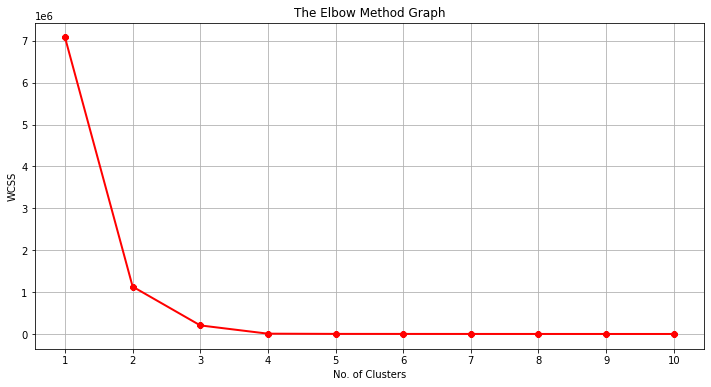

In [349]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title("The Elbow Method Graph") 
plt.xlabel("No. of Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


In [350]:
kmeansmodel = KMeans(n_clusters=3,init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)
y_kmeans

array([1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

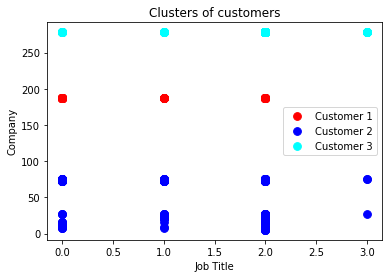

In [351]:
#fig = plt.figure(figsize=(20,10))
#Axes3D = fig.add_subplot(111, projection='3d')

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],  c='red', s=60 , label='Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],  c='blue', s=60 , label='Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],  c='cyan', s=60 , label='Customer 3')
#plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=100,c='magenta',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel("Job Title")
plt.ylabel("Company")
plt.legend()
plt.show()


In [ ]:
df.head()

**Job.Title,Rating**

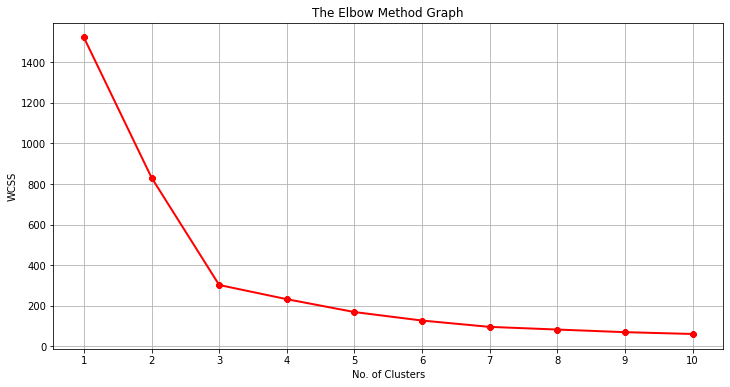

In [460]:

X2=df[["Job.Title","Rating"]]
X2 = np.array(X2) 
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title("The Elbow Method Graph") 
plt.xlabel("No. of Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()    




In [461]:
kmeansmodel = KMeans(n_clusters=3,init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(X2)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,

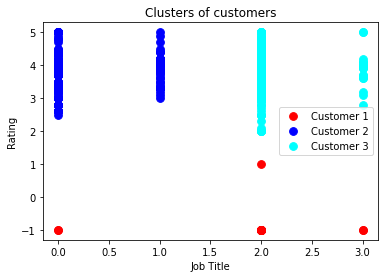

In [462]:
plt.scatter(X2[y_kmeans == 0,0], X2[y_kmeans == 0,1], c='red', s=60 , label='Customer 1')
plt.scatter(X2[y_kmeans == 1,0], X2[y_kmeans == 1,1], c='blue', s=60 , label='Customer 2')
plt.scatter(X2[y_kmeans == 2,0], X2[y_kmeans == 2,1], c='cyan', s=60 , label='Customer 3')
#plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=100,c='magenta',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel("Job Title")
plt.ylabel("Rating")
plt.legend()
plt.show()

In [ ]:
df.head()

**Job.Title,Location**

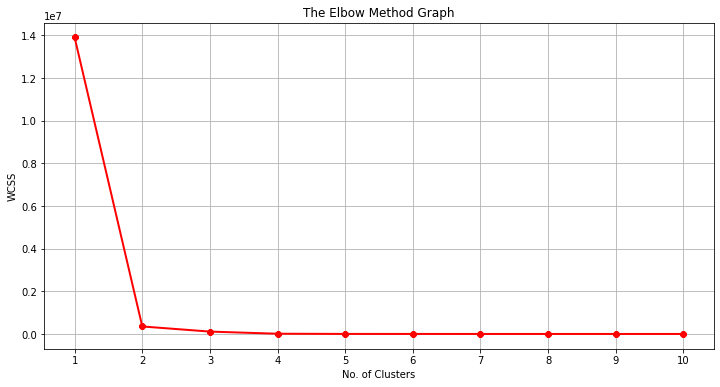

In [463]:
X3=df[["Job.Title","Location"]]
X3 = np.array(X3) 
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title("The Elbow Method Graph") 
plt.xlabel("No. of Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()   

In [356]:
kmeansmodel = KMeans(n_clusters=2,init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(X3)
y_kmeans

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

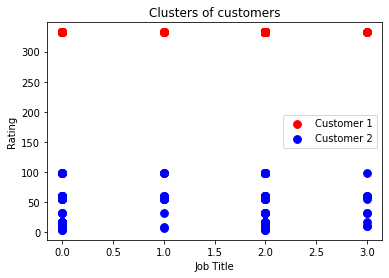

In [357]:
plt.scatter(X3[y_kmeans == 0,0], X3[y_kmeans == 0,1], c='red', s=60 , label='Customer 1')
plt.scatter(X3[y_kmeans == 1,0], X3[y_kmeans == 1,1], c='blue', s=60 , label='Customer 2')
#plt.scatter(X2[y_kmeans == 2,0], X2[y_kmeans == 2,1], c='cyan', s=60 , label='Customer 2')
#plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=100,c='magenta',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel("Job Title")
plt.ylabel("Rating")
plt.legend()
plt.show()

In [ ]:
df.head()

**Job.Title,Size**

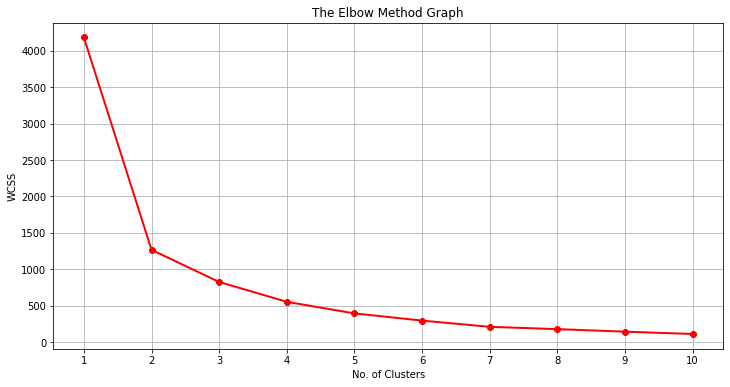

In [464]:
X4=df[["Job.Title","Size"]]
X4 = np.array(X4) 
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=0)
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title("The Elbow Method Graph") 
plt.xlabel("No. of Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()   

In [465]:
kmeansmodel = KMeans(n_clusters=3,init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(X4)
y_kmeans

array([0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2,
       1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0,
       2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0,
       1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2,
       1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0,
       1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1,

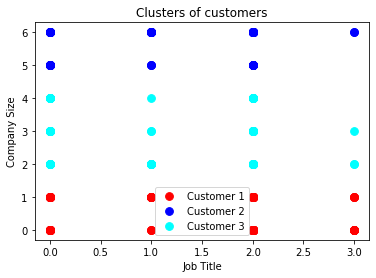

In [466]:
plt.scatter(X4[y_kmeans == 0,0], X4[y_kmeans == 0,1], c='red', s=60 , label='Customer 1')
plt.scatter(X4[y_kmeans == 1,0], X4[y_kmeans == 1,1], c='blue', s=60 , label='Customer 2')
plt.scatter(X4[y_kmeans == 2,0], X4[y_kmeans == 2,1], c='cyan', s=60 , label='Customer 3')
#plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=100,c='magenta',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel("Job Title")
plt.ylabel("Company Size")
plt.legend()
plt.show()

**Job.Title,Python**

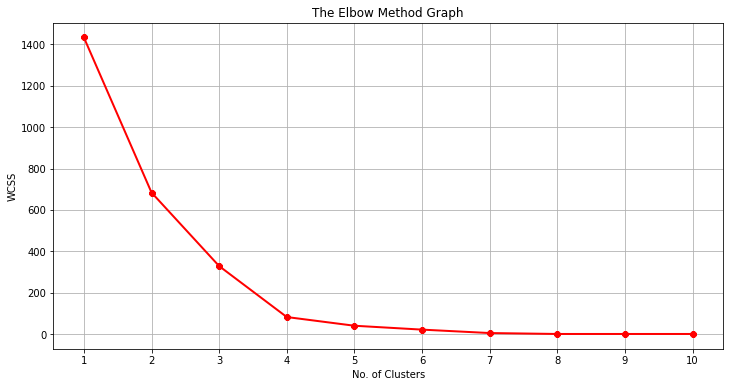

In [440]:
X5=df[["Job.Title","Python"]]
#X5 = np.array(X5) 
X5 = scaler.fit_transform(pd.DataFrame(X5).values)
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=0)
    kmeans.fit(X5)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title("The Elbow Method Graph") 
plt.xlabel("No. of Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()   

In [441]:
kmeansmodel = KMeans(n_clusters=4,init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(X5)
y_kmeans

array([3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0,
       3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 2, 3, 3, 3, 3,
       3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 0, 2, 3, 0,
       3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 1, 2, 0, 3, 3, 3, 3,
       0, 3, 0, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 0, 3, 0, 0,
       3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 0, 3, 1, 3, 0, 3, 3, 3, 1, 3, 0, 3,
       0, 0, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 2, 3, 2, 3, 2, 1,
       3, 2, 1, 3, 3, 3, 2, 3, 0, 0, 3, 1, 3, 3, 1, 0, 3, 3, 3, 3, 2, 2,
       3, 0, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3,

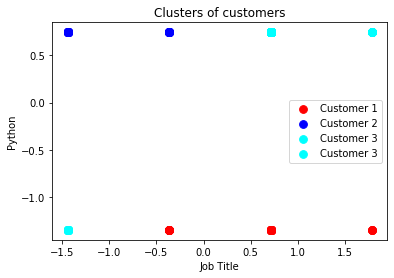

In [442]:
plt.scatter(X5[y_kmeans == 0,0], X5[y_kmeans == 0,1], c='red', s=60 , label='Customer 1')
plt.scatter(X5[y_kmeans == 1,0], X5[y_kmeans == 1,1], c='blue', s=60 , label='Customer 2')
plt.scatter(X5[y_kmeans == 2,0], X5[y_kmeans == 2,1], c='cyan', s=60 , label='Customer 3')
plt.scatter(X5[y_kmeans == 3,0], X5[y_kmeans == 3,1], c='cyan', s=60 , label='Customer 3')
#plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=100,c='magenta',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel("Job Title")
plt.ylabel("Python")
plt.legend()
plt.show()

In [416]:
salary_dataset

,key_skills,location,min_experience,max_experience,experience,min_salary,max_salary,salary
0,6,4168,7,10,8.5,10,15,12.5
1,4,1193,6,10,8.0,6,10,8.0
2,3,2508,2,4,3.0,6,10,8.0
3,2,4168,5,8,6.5,6,10,8.0
4,2,4168,3,6,4.5,10,15,12.5
...,...,...,...,...,...,...,...,...
10615,2,1193,1,3,2.0,0,3,1.5
10616,6,1083,12,18,15.0,15,25,20.0
10617,6,1083,8,13,10.5,15,25,20.0
10618,2,1193,1,3,2.0,10,15,12.5


In [434]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [443]:
salary_dataset

,key_skills,location,min_experience,max_experience,experience,min_salary,max_salary,salary
0,6,4168,7,10,8.5,10,15,12.5
1,4,1193,6,10,8.0,6,10,8.0
2,3,2508,2,4,3.0,6,10,8.0
3,2,4168,5,8,6.5,6,10,8.0
4,2,4168,3,6,4.5,10,15,12.5
...,...,...,...,...,...,...,...,...
10615,2,1193,1,3,2.0,0,3,1.5
10616,6,1083,12,18,15.0,15,25,20.0
10617,6,1083,8,13,10.5,15,25,20.0
10618,2,1193,1,3,2.0,10,15,12.5


"key_skills","min_experience","location"

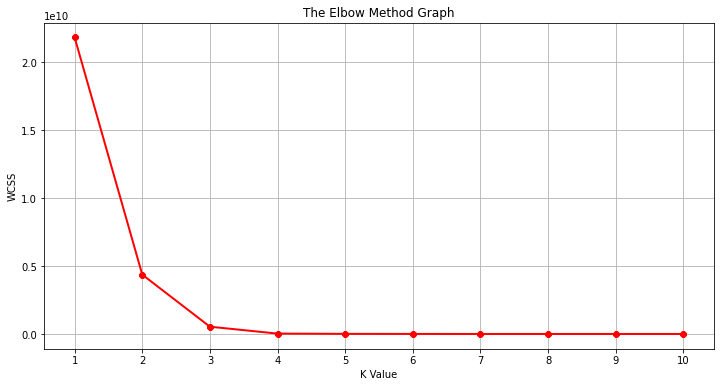

In [480]:
from sklearn.cluster import KMeans
X2=salary_dataset[["key_skills","min_salary","location"]]
X2 = np.array(X2)
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title("The Elbow Method Graph") 
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [481]:
kmeansmodel = KMeans(n_clusters=3,init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(X2)
y_kmeans

array([1, 0, 2, ..., 0, 0, 0], dtype=int32)